# Análise de Evasão no Ensino Superior

## Introdução

O acesso a uma educação de qualidade é essencialmente um direito fundamental, e governos ao redor do mundo se empenham incansavelmente para assegurar que todas as crianças se matriculem e completem sua educação formal. No entanto, o abandono escolar ainda representa um desafio significativo, sendo influenciado por uma complexa malha de fatores sociais, econômicos e demográficos.

Com base nessa premissa, este notebook, alinhado ao propósito do artigo principal, visa esclarecer essa problemática. Emprega-se, para tanto, uma abordagem analítica robusta, que integra técnicas de engenharia e ciência de dados complementadas pelo uso de aprendizado de máquina.

O objetivo é identificar os principais fatores que contribuem para a evasão escolar, focando especificamente no contexto do ensino superior. Essa delimitação permite uma investigação mais aprofundada e a geração de insights pertinentes que podem fundamentar o desenvolvimento de políticas públicas mais eficazes para mitigar o fenômeno da evasão.

Embora o foco se concentre no ensino superior, os métodos e descobertas deste estudo têm o potencial de servir como base para investigações futuras voltadas a outros níveis educacionais, ampliando assim o escopo de aplicabilidade das estratégias de intervenção educacional.

Os dados originais foram extraídos da seguinte fonte:
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


Realinho, Valentim, Vieira Martins, Mónica, Machado, Jorge, and Baptista,Luís. (2021). Predict Students' Dropout and Academic Success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

### Descrição dos dados

| Nome da coluna | Descrição |
|-------------|-------------|
| Marital status | O estado civil do estudante. |
| Application mode | O método de aplicação utilizado pelo estudante. |
| Application order | A ordem em que o estudante se aplicou. |
| Course | O curso realizado pelo estudante. |
| Daytime/evening attendance | Se o estudante assiste às aulas durante o dia ou à noite. |
| Previous qualification | A qualificação obtida pelo estudante antes de se matricular no ensino superior. |
| Nacionality | A nacionalidade do estudante. |
| Mother's qualification | A qualificação da mãe do estudante. |
| Father's qualification | A qualificação do pai do estudante. |
| Mother's occupation | A ocupação da mãe do estudante. |
| Father's occupation | A ocupação do pai do estudante. |
| Displaced | Se o estudante é uma pessoa deslocada. |
| Educational special needs | Se o estudante tem necessidades educacionais especiais. |
| Debtor | Se o estudante é devedor. |
| Tuition fees up to date | Se as taxas de matrícula do estudante estão em dia. |
| Gender | O gênero do estudante. |
| Scholarship holder | Se o estudante é bolsista. |
| Age at enrollment | A idade do estudante no momento da matrícula. |
| International | Se o estudante é internacional. |
| Curricular units 1st sem (credited) | O número de unidades curriculares creditadas pelo estudante no primeiro semestre. |
| Curricular units 1st sem (enrolled) | O número de unidades curriculares em que o estudante se matriculou no primeiro semestre. |
| Curricular units 1st sem (evaluations) | O número de unidades curriculares avaliadas pelo estudante no primeiro semestre. |
| Curricular units 1st sem (approved) | O número de unidades curriculares aprovadas pelo estudante no primeiro semestre. |


## Análise Exploratório dos DAdos (EDA)

Para iniciar a análise exploratória de dados (EDA) deste conjunto de dados, vamos primeiro carregá-lo e verificar as primeiras linhas para entender sua estrutura. Também examinaremos suas propriedades estatísticas básicas, verificaremos valores ausentes e identificaremos os tipos de variáveis que ele contém. Isso nos ajudará a planejar etapas adicionais de análise, incluindo visualizações e investigação mais detalhada de questões específicas de seu interesse, como fatores ligados à evasão ou conclusão do aluno e como diferentes recursos interagem entre si. Vamos começar carregando o conjunto de dados.

In [ ]:
import pandas as pd

file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


O conjunto de dados consiste em vários recursos relacionados aos fatores demográficos, socioeconômicos e de desempenho acadêmico dos alunos, incluindo:

* Estado civil
* Modo de aplicação
* Pedido de inscrição
* Curso
* Atendimento diurno/noturno
* Qualificação anterior
* Nacionalidade
* Qualificações e ocupações dos pais
* Notas de admissão
* Número de unidades curriculares inscritas, avaliadas, aprovadas e respetivas classificações nos dois semestres
* Indicadores econômicos como taxa de desemprego, taxa de inflação e PIB

Vamos resumir o conjunto de dados para compreender suas propriedades estatísticas básicas, verificar se há valores ausentes e identificar os tipos de variáveis que ele contém. Este resumo orientará ainda mais nossa análise exploratória.

In [ ]:
missing_values = data.isnull().sum()

statistical_summary = data.describe()

data_types = data.dtypes

missing_values, statistical_summary, data_types

(Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance                        0
 Previous qualification                            0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                                0
 Age at enrollment                                 0
 International                                

O conjunto de dados contém 4.424 entradas e nenhum valor ausente em todas as variáveis, indicando que está relativamente limpo e completo para análise. As variáveis são uma mistura de tipos de dados inteiros, flutuantes e de objeto, com a variável "Target" sendo categórica, denotando os resultados dos alunos como "Abandono", "Graduação" ou "Matriculado".

Os resumos estatísticos fornecem informações sobre vários fatores, como a distribuição de idades de matrícula, notas, número de unidades curriculares creditadas, matriculadas, avaliadas, aprovadas e suas notas nos dois semestres, além de indicadores socioeconômicos como taxa de desemprego, taxa de inflação, e PIB.

Dadas essas informações, podemos prosseguir com a análise exploratória dos dados para investigar as questões específicas de interesse:

1. Quais fatores preditivos específicos estão ligados à evasão ou conclusão dos alunos? Podemos analisar isso examinando as correlações entre a variável “Target” e outros recursos, e realizando análises univariadas e multivariadas.

2. Como os diferentes recursos interagem entre si? Isto pode ser explorado através de matrizes de correlação, gráficos de dispersão e, potencialmente, através de modelos mais complexos ou visualizações que capturam interações entre variáveis.

Vamos começar visualizando a distribuição da variável alvo para entender o equilíbrio entre graduados e desistentes. Então, podemos explorar correlações e interações entre variáveis.

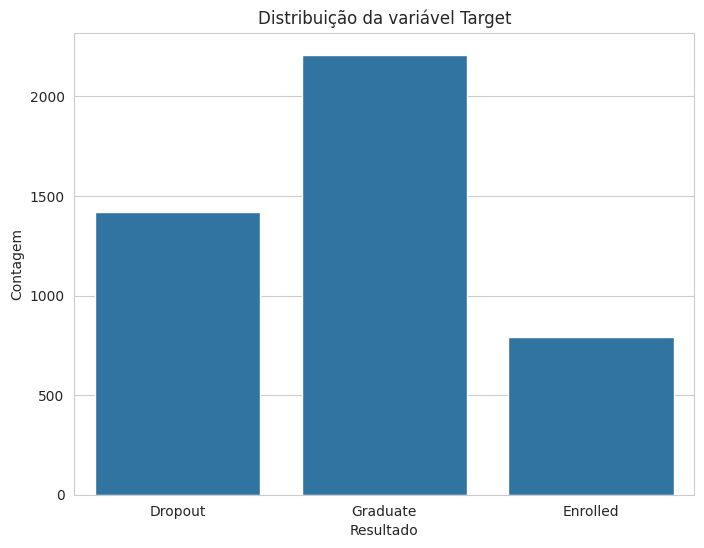

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Target')
plt.title('Distribuição da variável Target')
plt.xlabel('Resultado')
plt.ylabel('Contagem')
plt.show()

A distribuição da variável alvo mostra a contagem de alunos que se formaram versus aqueles que desistiram. Esta visualização é crucial para compreender o equilíbrio entre os dois resultados no conjunto de dados e informa-nos sobre a taxa geral de sucesso dos alunos neste contexto académico específico.

Em seguida, podemos examinar as correlações entre as características numéricas e a variável alvo para identificar potenciais fatores preditivos associados à evasão ou conclusão dos alunos. Além disso, investigar como diferentes recursos interagem entre si pode fornecer insights sobre a dinâmica que influencia os resultados dos alunos. Vamos começar analisando as correlações entre variáveis numéricas e depois explorar alguns dos principais recursos com mais detalhes.

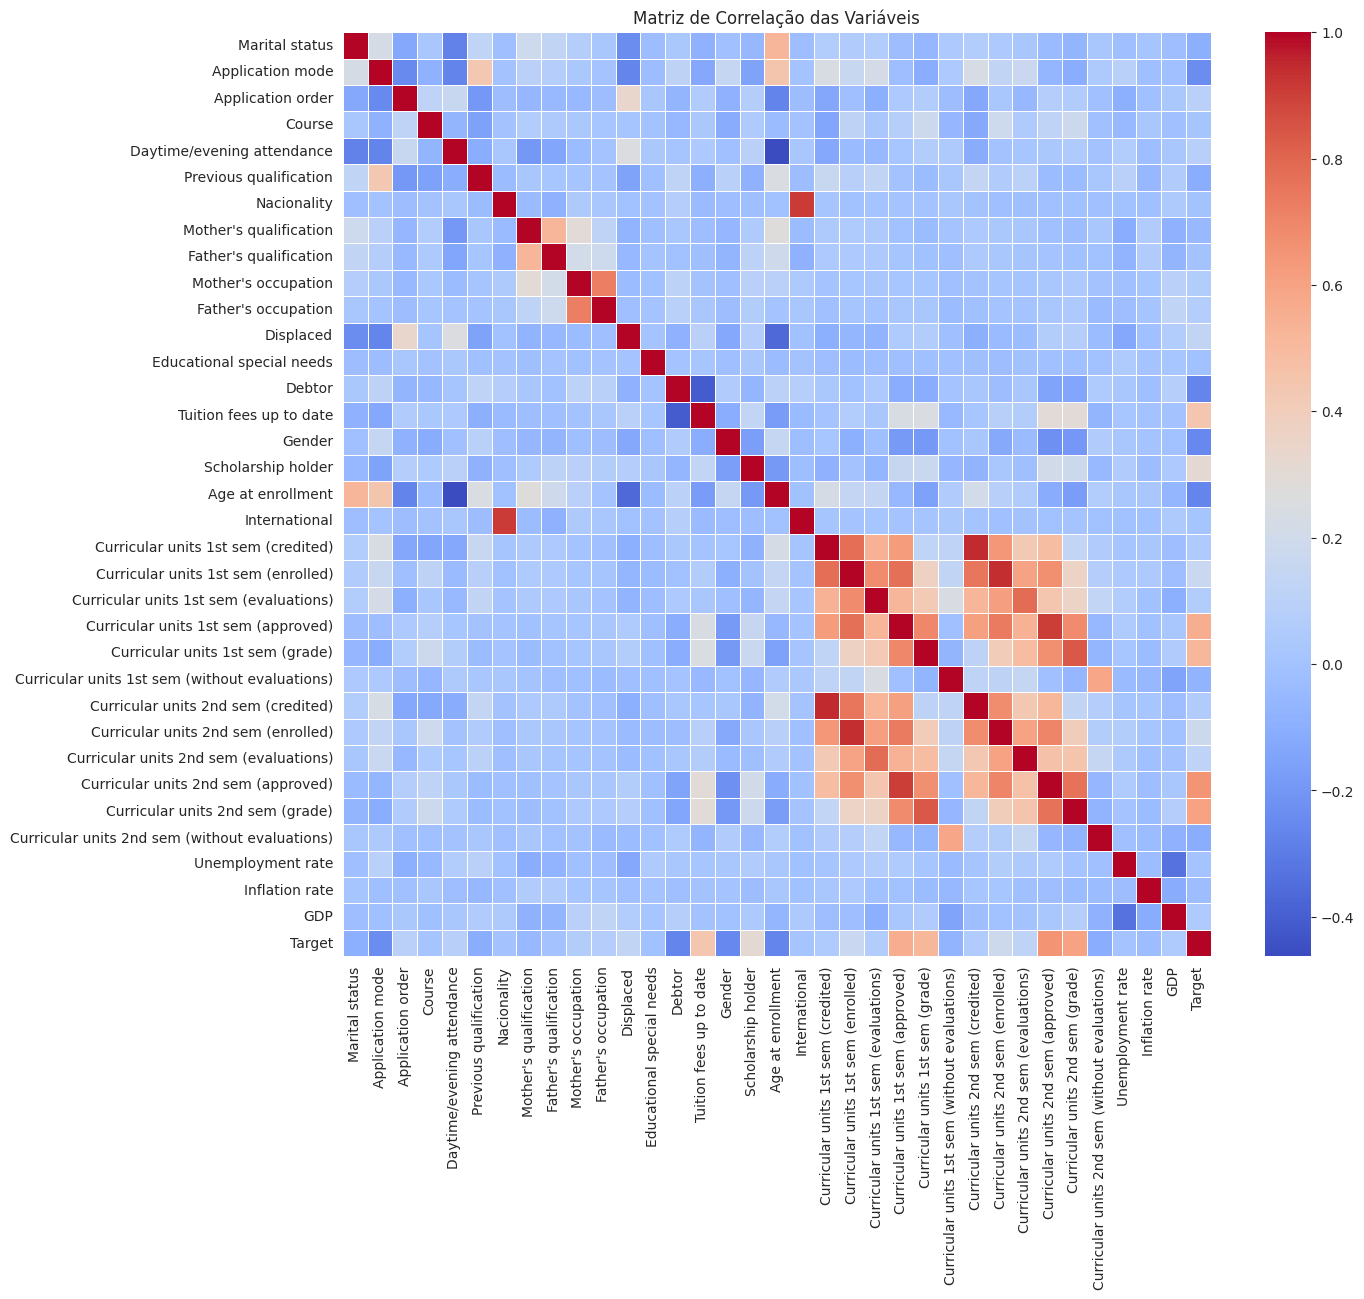

In [ ]:
data_encoded = data.copy()
data_encoded['Target'] = data_encoded['Target'].map({'Dropout': 0, 'Graduate': 1})

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [ ]:
correlation_with_target = correlation_matrix['Target'].sort_values(key=abs, ascending=False)
correlation_with_target

Target                                            1.000000
Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Age at enrollment                                -0.267229
Debtor                                           -0.267207
Gender                                           -0.251955
Application mode                                 -0.233888
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (enrolled)               0.161074
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119239
Previous qualification                           -0.102795
Curricular units 2nd sem (without evaluations)   -0.1026

A análise de correlação revela vários insights interessantes sobre fatores que podem prever os resultados dos alunos:

* **Unidades curriculares aprovadas e notas**: O número de unidades curriculares aprovadas tanto no 1.º como no 2.º semestre, bem como as respectivas classificações, apresentam fortes correlações positivas com a variável "Target". Isto sugere que o desempenho acadêmico é um preditor significativo para saber se um aluno se forma ou desiste.

* **Mensalidades em dia**: Os alunos com mensalidades em dia têm maior probabilidade de se formar, indicado por uma correlação positiva moderada com a variável "Target".

* **Bolsista**: Ser bolsista está moderadamente correlacionado com a formatura, o que pode refletir estabilidade financeira ou motivação ligada à manutenção dos critérios da bolsa.

* **Idade de matrícula e dívida**: Ambos os fatores estão negativamente correlacionados com a conclusão do curso, sugerindo que os alunos mais velhos no momento da matrícula e os que têm dívidas têm maior probabilidade de desistir.

* **Gênero e modo de aplicação**: mostram correlações negativas moderadas com a graduação, indicando potenciais fatores demográficos e relacionados à aplicação que influenciam os resultados dos alunos.

Essas descobertas fornecem uma compreensão básica dos fatores que influenciam o sucesso dos alunos e as taxas de abandono. Para uma análise mais detalhada, pesquisas posteriores podem explorar mais estas variáveis, examinando como interagem entre si e impactam os resultados dos alunos em diferentes contextos demográficos e socioeconômicos.

## Machine Learning

### Relevância

O aprendizado de máquina (ML) pode ser particularmente importante na previsão dos resultados dos alunos por vários motivos:

* **Reconhecimento de padrões**: os algoritmos de ML são excelentes na identificação de padrões complexos em grandes conjuntos de dados que podem não ser imediatamente aparentes para os humanos. Esta capacidade pode ajudar a detectar fatores subjacentes que contribuem para o sucesso ou abandono dos alunos, que são cruciais para intervenções específicas.
* **Análise Preditiva**: Ao aproveitar dados históricos, os modelos de ML podem prever o desempenho futuro dos alunos, permitindo que as instituições educacionais ofereçam suporte proativamente aos alunos em risco.
* **Personalização**: O ML permite a personalização de experiências educacionais, compreendendo e adaptando-se às necessidades únicas e aos fatores de risco de cada aluno, aumentando potencialmente o envolvimento e as taxas de sucesso.
* **Tomada de decisões baseada em dados**: Com o ML, as escolas e universidades podem tomar decisões baseadas em evidências sobre o desenvolvimento curricular, alocação de recursos e mudanças políticas destinadas a melhorar os resultados dos alunos.

## Modelos de Machine Learning

Vários modelos de aprendizagem automática podem ser adequados para prever os resultados dos alunos, dependendo da natureza dos dados e dos requisitos específicos da tarefa. Aqui estão alguns modelos comumente usados:

* **Regressão Logística**: Um bom modelo básico para problemas de classificação binária, como prever se um aluno se formará ou desistirá. É interpretável e pode fornecer insights sobre a importância de diferentes recursos.

* **Árvores de Decisão e RandomForest**: Esses modelos podem lidar com dados numéricos e categóricos e são capazes de capturar interações complexas entre recursos. RandomForest, em particular, é mais robusto e menos propenso a overfitting em comparação com Árvores de Decisão individuais.

* **Gradient Boosting Machines (GBM)**: modelos como XGBoost, LightGBM e CatBoost são poderosos para tarefas de classificação e podem lidar bem com dados desequilibrados. Eles são frequentemente usados em competições e aplicações do mundo real por seu desempenho e velocidade.

* **Redes Neurais**: Para conjuntos de dados maiores ou quando as relações entre recursos são altamente não lineares, os modelos de aprendizagem profunda podem ser benéficos. Eles exigem mais dados e recursos computacionais, mas podem capturar padrões e interações complexas.

## Implementação de um modelo de Machine Learning

Dada a natureza do conjunto de dados e da tarefa (classificação: "Graduate" vs. "Enrolled" vs. "Dropout"), um Random Forest Classifier é um forte candidato devido à sua robustez, capacidade de lidar com diferentes tipos de dados e interpretabilidade. Vamos implementar um modelo Random Forest para prever os resultados dos alunos.

### 1: Pré-processamento dos dados


Antes de aplicar modelos de aprendizado de máquina, o pré-processamento de dados é essencial. Isso inclui a codificação de variáveis categóricas, o tratamento de valores ausentes (se houver) e a divisão dos dados em conjuntos de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2: Treinar o classificador RandomForest

Agora, treinamos um classificador RandomForest usando os dados de treinamento. RandomForest é um modelo robusto que lida bem com overfitting e pode lidar com dados numéricos e categóricos de maneira eficaz.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

### 3: Previsões e avaliação

Depois de treinar o modelo, nós o usamos para fazer previsões no conjunto de teste e avaliar seu desempenho usando exatidão, precisão, recall e pontuação F1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}')


report = classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate'])
print(report)

Precision: 0.7582303146197522
Recall: 0.7728813559322034
F1-Score: 0.7571755114240024
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.53      0.32      0.40       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.68       885
weighted avg       0.76      0.77      0.76       885



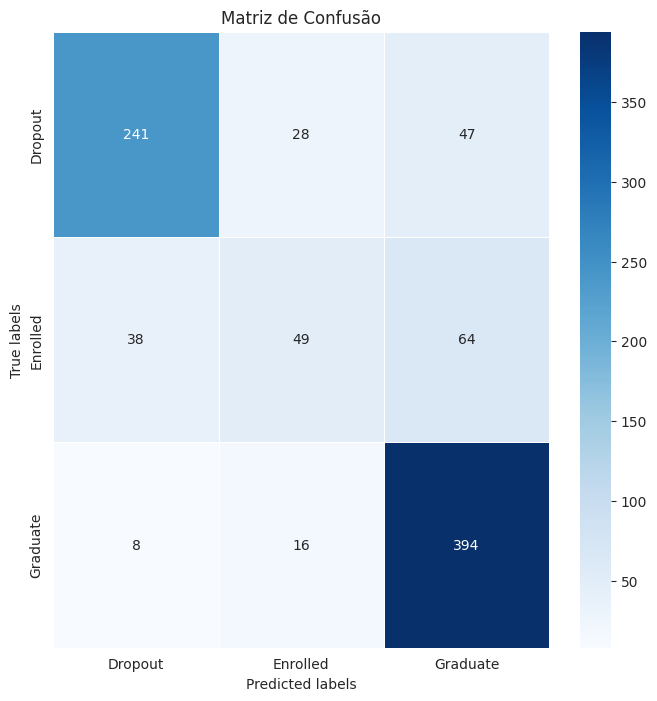

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Matriz de Confusão')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Relatório de Classificação

O relatório de classificação fornece um detalhamento de precisão, recall e pontuação F1 para cada classe:

**Precisão**: Isso nos diz, de todas as instâncias que o modelo previu para uma classe, quantas estavam realmente corretas.

Para ‘Dropout’, a precisão é de 0,84, o que é bastante alta.
Esta métrica nos mostra, de todas as instâncias reais de uma classe, quantas o modelo conseguiu capturar. Para 'Graduate', o recall é bastante alto, 0,94, indicando que o modelo foi capaz de identificar a maioria dos verdadeiros casos de 'Graduate'.

**Pontuação F1**: Esta é uma média harmônica de precisão e recall e fornece uma pontuação única que equilibra ambas as preocupações.

Para 'Graduate', uma pontuação F1 de 0,85 indica um bom equilíbrio entre precisão e recuperação.


**Suporte**: mostra o número de ocorrências reais de cada classe no conjunto de dados. É claro que 'Graduate' é a turma mais comum, sendo 'Enrolled' a menos comum.

A média ponderada da pontuação F1 de 0,77 é bastante boa e sugere que o modelo tem um bom desempenho geral, especialmente na identificação de alunos de “Graduate.

### Matriz de Confusão

A matriz de confusão mostra as classificações reais versus previstas:

Os elementos diagonais (241 Dropout, 49 Enrolled, 394 Graduate) mostram o número de acertos de cada turma.

Elementos fora da diagonal mostram o número de erros de classificação, como 47 Desistentes sendo previstos incorretamente como Graduados e 16 Graduados sendo previstos incorretamente como Matriculados.

O modelo parece ter melhor desempenho na identificação de graduados e pior na identificação de alunos matriculados, provavelmente devido ao menor número de instâncias matriculadas com as quais aprender (desequilíbrio de turma).

### Considerações

**Desequilíbrio de classe**: A classe 'Enrolled' está sub-representada, o que pode explicar o menor recall e pontuação F1. Talvez seja necessário aplicar técnicas para resolver esse desequilíbrio.

**Utilização do modelo**: Se o objetivo do modelo é fornecer intervenções precoces para alunos em risco de abandono escolar, então o elevado recall da turma de Dropout (0,76) é encorajador. Isso sugere que o modelo é muito bom na identificação de alunos em risco.

**Melhorias adicionais**: Pode-se tentar melhorar o desempenho do modelo, especialmente para a classe 'Enrolled', coletando mais dados, usando técnicas de ponderação de classe ou tentando algoritmos diferentes que possam lidar melhor com o desequilíbrio.

Em resumo, o modelo funciona bem para as turmas de "Graduate" e "Dropout", mas poderia beneficiar de melhorias na identificação de alunos "Enrolled".

A elevada precisão global e as pontuações F1 sugerem que o modelo pode ser uma ferramenta útil no contexto das previsões de resultados educativos, mas há espaço para melhorias, especialmente para a classe sub-representada.

## Otimização dos resultados das 3 classes

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ..............................C=0.001, max_iter=100; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=200; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=200; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=200; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=200; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=200; total time=   0.1s
[CV] END ..............................C=0.001, max_iter=300; total time=   0.1s
[CV] END ..............................C=0.001, 

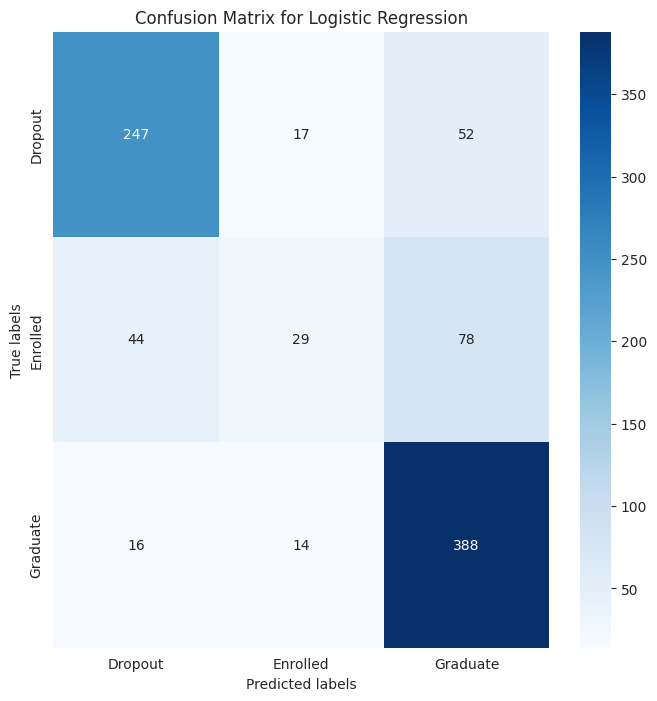

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=2)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score from GridSearchCV: {best_score}")


best_estimator = grid_search.best_estimator_
y_pred_log_reg = best_estimator.predict(X_test)


report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Dropout', 'Enrolled', 'Graduate'])
print(report_log_reg)


cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)


plt.figure(figsize=(8, 8))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1, decision_function_shape='ovr'))

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_svm, target_names=['Dropout', 'Enrolled', 'Graduate']))


              precision    recall  f1-score   support

     Dropout       0.86      0.74      0.80       316
    Enrolled       0.46      0.32      0.38       151
    Graduate       0.76      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


print(classification_report(y_test, y_pred_knn, target_names=['Dropout', 'Enrolled', 'Graduate']))


              precision    recall  f1-score   support

     Dropout       0.74      0.62      0.67       316
    Enrolled       0.26      0.19      0.22       151
    Graduate       0.68      0.83      0.75       418

    accuracy                           0.65       885
   macro avg       0.56      0.55      0.55       885
weighted avg       0.63      0.65      0.63       885



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb, target_names=['Dropout', 'Enrolled', 'Graduate']))


              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       316
    Enrolled       0.49      0.40      0.44       151
    Graduate       0.78      0.89      0.83       418

    accuracy                           0.75       885
   macro avg       0.70      0.68      0.68       885
weighted avg       0.74      0.75      0.75       885



### Buscando modelos mais eficientes pela curva ROC

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [ ]:
url = '/content/dataset.csv'
data = pd.read_csv(url)


data = data[data['Target'] != 'Enrolled']

le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])  # Isso codificará 'Dropout' como 0 e 'Graduate' como 1

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Relatório de Classificação para Logistic Regression:
               precision    recall  f1-score   support

     Dropout       0.93      0.86      0.89       414
    Graduate       0.92      0.96      0.94       675

    accuracy                           0.92      1089
   macro avg       0.92      0.91      0.91      1089
weighted avg       0.92      0.92      0.92      1089



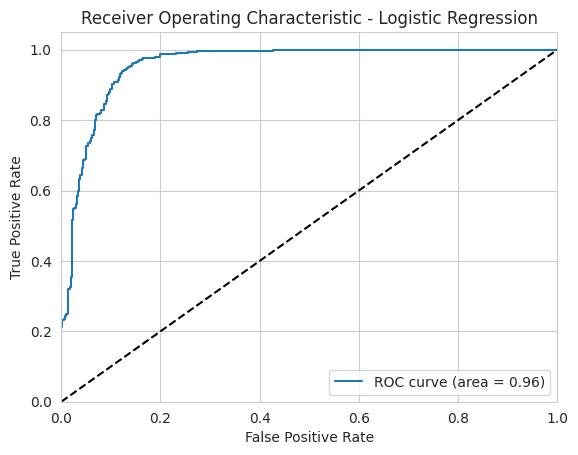

Relatório de Classificação para Random Forest:
               precision    recall  f1-score   support

     Dropout       0.92      0.83      0.87       414
    Graduate       0.90      0.95      0.93       675

    accuracy                           0.91      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



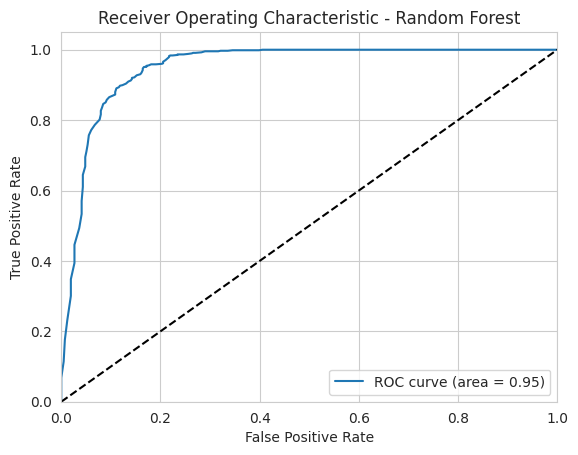

Relatório de Classificação para Support Vector Machine:
               precision    recall  f1-score   support

     Dropout       0.94      0.78      0.86       414
    Graduate       0.88      0.97      0.92       675

    accuracy                           0.90      1089
   macro avg       0.91      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089



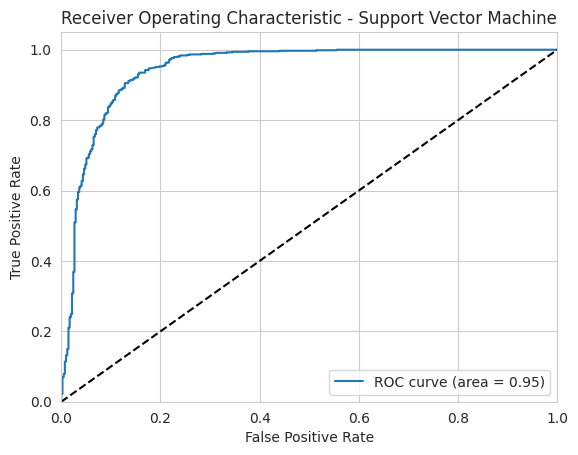

Relatório de Classificação para K-Nearest Neighbors:
               precision    recall  f1-score   support

     Dropout       0.88      0.66      0.75       414
    Graduate       0.82      0.94      0.88       675

    accuracy                           0.84      1089
   macro avg       0.85      0.80      0.81      1089
weighted avg       0.84      0.84      0.83      1089



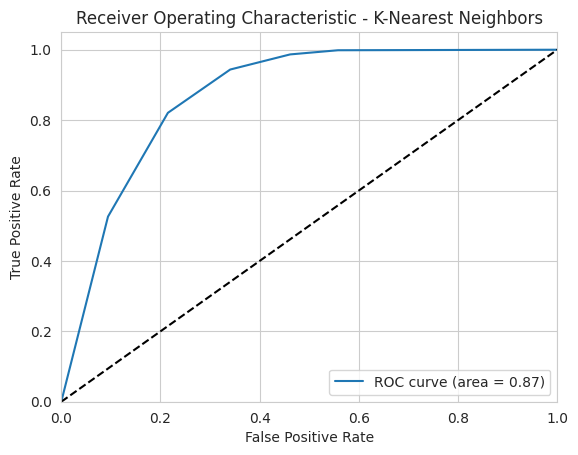

Relatório de Classificação para Decision Tree:
               precision    recall  f1-score   support

     Dropout       0.80      0.83      0.81       414
    Graduate       0.89      0.88      0.88       675

    accuracy                           0.86      1089
   macro avg       0.85      0.85      0.85      1089
weighted avg       0.86      0.86      0.86      1089



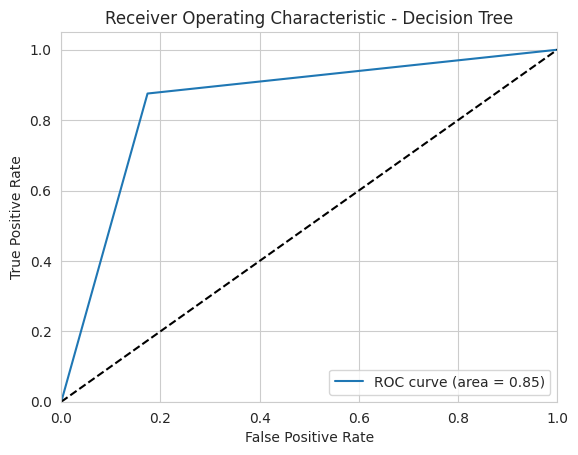

In [ ]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"Relatório de Classificação para {name}:\n",
          classification_report(y_test, y_pred, target_names=le.classes_))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name] = (fpr, tpr, roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
target_encoder = LabelEncoder()
data['Target'] = target_encoder.fit_transform(data['Target'])


X = data.drop('Target', axis=1)
y = data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Regressão Logística

In [ ]:
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Melhores hiperparâmetros para Regressão Logística:", grid_lr.best_params_)
print("Melhor score:", grid_lr.best_score_)

Melhores hiperparâmetros para Regressão Logística: {'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor score: 0.9102679331095402


Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Melhores hiperparâmetros para Random Forest:", grid_rf.best_params_)
print("Melhor score:", grid_rf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Melhores hiperparâmetros para Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor score: 0.9075143480345901


SVM

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Melhores hiperparâmetros para SVM:", grid_svm.best_params_)
print("Melhor score:", grid_svm.best_score_)

Melhores hiperparâmetros para SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Melhor score: 0.9090891511841963


### Relatórios de Classificação

In [ ]:
best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_
best_svm = grid_svm.best_estimator_

print("Relatório de classificação para a Regressão Logística otimizada:")
print(classification_report(y_test, best_lr.predict(X_test)))

print("Relatório de classificação para o Random Forest otimizado:")
print(classification_report(y_test, best_rf.predict(X_test)))

print("Relatório de classificação para o SVM otimizado:")
print(classification_report(y_test, best_svm.predict(X_test)))


Relatório de classificação para a Regressão Logística otimizada:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       414
           1       0.91      0.96      0.93       675

    accuracy                           0.92      1089
   macro avg       0.92      0.90      0.91      1089
weighted avg       0.92      0.92      0.92      1089

Relatório de classificação para o Random Forest otimizado:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       414
           1       0.89      0.96      0.92       675

    accuracy                           0.90      1089
   macro avg       0.91      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089

Relatório de classificação para o SVM otimizado:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       414
           1       0.90      0.97      0.94       675

    accur